<a href="https://colab.research.google.com/github/yeondubudu/-/blob/main/0_%EC%B4%88%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 관세청_품목별 국가별 수출입실적 파일에서 중국 국가 데이터 불러오기

In [36]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [1]:
# 관세청_품목별 국가별 수출입실적(중국)

import requests
import xml.etree.ElementTree as ET
import pandas as pd

DATA_years = []
startyear = 2018
endyear = 2023
params ={'balPayments': 0,
    'expDlr': 0,
    'expWgt': 0,
    'hsCd': 0,
    'impDlr': 0,
    'impWgt': 0,
    'statCd': "string",
    'statCdCntnKor1': "string",
    'statKor': "string",
    'year': "string"}
service_key = "6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D"

for year in range(startyear, endyear+1):
    base_url = f"http://apis.data.go.kr/1220000/nitemtrade/getNitemtradeList?strtYymm={year}01&endYymm={year}12&cntyCd=CN&serviceKey={service_key}"

    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.request.url}")
    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        items = root.findall(".//item")
        all_data = []
        for item in items:
            data = {child.tag: child.text for child in item}
            all_data.append(data)

        # 확인용 출력
        for i, item in enumerate(all_data):
            print(f"[{i+1}]")
            for k, v in item.items():
                print(f"{k}: {v}")
            print("-" * 30)

        for item in root.findall('.//item'):
            row = {
                'balPayments': item.findtext('balPayments'),
                'expDlr': item.findtext('expDlr'),
                'expWgt': item.findtext('expWgt'),
                'hsCd': item.findtext('hsCd'),
                'impDlr': item.findtext('impDlr'),
                'impWgt': item.findtext('impWgt'),
                'statCd': item.findtext('statCd'),
                'statCdCntnKor1': item.findtext('statCdCntnKor1'),
                'statKor': item.findtext('statKor'),
                'year': item.findtext('year'),
            }
            DATA_years.append(row)

df = pd.DataFrame(DATA_years)
print(df)
# df.to_csv('관세청_품목별 국가별 수출입실적_CN_전품목.csv', index=False, encoding='utf-8-sig')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
statCd: CN
statCdCntnKor1: 중국
statKor: 회로계
year: 2023.12
------------------------------
[91279]
balPayments: -14240
expDlr: 1144
expWgt: 8
hsCd: 9030394000
impDlr: 15384
impWgt: 20
statCd: CN
statCdCntnKor1: 중국
statKor: 저항계
year: 2023.12
------------------------------
[91280]
balPayments: -1545741
expDlr: 4197
expWgt: 102
hsCd: 9030396000
impDlr: 1549938
impWgt: 219
statCd: CN
statCdCntnKor1: 중국
statKor: 주파수 측정기
year: 2023.12
------------------------------
[91281]
balPayments: -5521469
expDlr: 795677
expWgt: 5566
hsCd: 9030399000
impDlr: 6317146
impWgt: 496044
statCd: CN
statCdCntnKor1: 중국
statKor: 기타
year: 2023.12
------------------------------
[91282]
balPayments: -3434
expDlr: 361045
expWgt: 338
hsCd: 9030400000
impDlr: 364479
impWgt: 927
statCd: CN
statCdCntnKor1: 중국
statKor: 전기통신용으로 특별히 설계된 그 밖의 기기[예: 누화계(cross-talk meter)ㆍ게인측정계(gain measuring instrument)ㆍ만곡률계(distortion factor meter)ㆍ잡음전압계(psophometer)]
year: 2023.12
---------------------------

# 2. 관세청_품목별 데이터 불러오기

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

DATA_years = []
startyear = 2018
endyear = 2023
params = {'balPayments': 0,
    'expDlr': 0,
    'expWgt': 0,
    'hsCode': 0,
    'impDlr': 0,
    'impWgt': 0,
    'statKor': "string",
    'year': "string"}
service_key = "6jK8kGaUbTpAEnpYdEmZF9niO7M448lpE6%2BrhbKlvPsX%2FAd3kh%2B7S5Qk7Rl9%2BzvjVqCnVakX%2FO6v7oWE3swSpQ%3D%3D"

for year in range(startyear, endyear+1):
    base_url = f"https://apis.data.go.kr/1220000/Itemtrade/getItemtradeList?serviceKey={service_key}&strtYymm={year}01&endYymm={year}12"

    response = requests.get(base_url, params=params)
    print(f"Request URL: {response.request.url}")
    print(f"Response Status Code: {response.status_code}")

    if response.status_code == 200:
        root = ET.fromstring(response.text)
        items = root.findall(".//item")
        all_data = []
        for item in items:
            data = {child.tag: child.text for child in item}
            all_data.append(data)

        # 확인용 출력
        for i, item in enumerate(all_data):
            print(f"[{i+1}]")
            for k, v in item.items():
                print(f"{k}: {v}")
            print("-" * 30)

        for item in root.findall('.//item'):
            row = {
                'balPayments': item.findtext('balPayments'),
                'expDlr': item.findtext('expDlr'),
                'expWgt': item.findtext('expWgt'),
                'hsCode': item.findtext('hsCode'),
                'impDlr': item.findtext('impDlr'),
                'impWgt': item.findtext('impWgt'),
                'statKor': item.findtext('statKor'),
                'year': item.findtext('year'),
            }
            DATA_years.append(row)

df = pd.DataFrame(DATA_years)
print(df)
# df.to_csv('관세청_품목별 수출입실적.csv', index=False, encoding='utf-8-sig')

# 3. 중국 수출입 비중 구하기(대 중국 수출 금액 / 대 전국가 수출 금액)
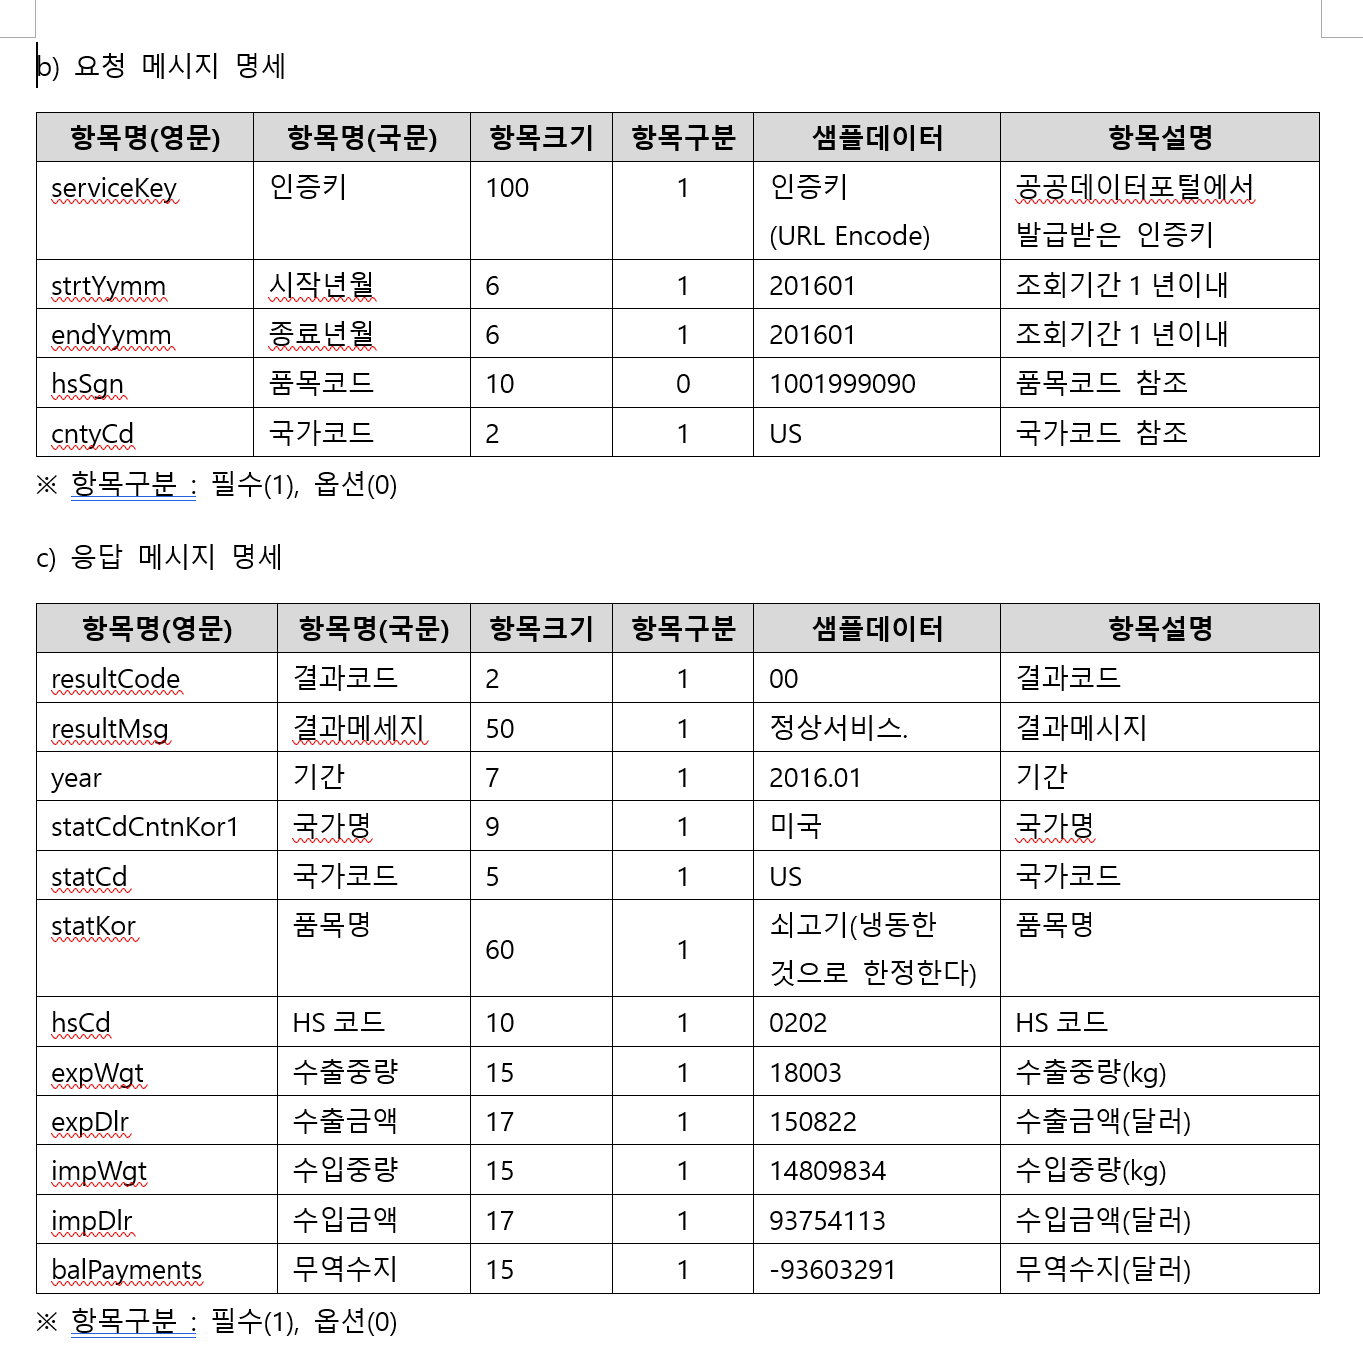

1. 요청 메시지
- serviceKey	인증키
- strtYymm	시작년월
- endYymm	종료년월
- hsSgn	품목코드
- cntyCd	국가코드

2. 응답 메시지
- resultCode	결과코드
- resultMsg	결과메세지
- year	기간
- statCdCntnKor1	국가명
- statCd	국가코드
- statKor	품목명
- hsCd	HS코드
- expWgt	수출중량
- expDlr	수출금액
- impWgt	수입중량
- impDlr	수입금액
- balPayments	무역수지



In [6]:
# 필요할법한 라이브러리들 일단 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

In [7]:
# 대중 수출 데이터 및 대전세계 데이터 불러오기
df_total = pd.read_csv("/content/관세청_품목별 수출입실적.csv", encoding='utf-8', low_memory=False)
df_china = pd.read_csv("/content/관세청_품목별 국가별 수출입실적_CN_전품목.csv", encoding='utf-8', low_memory=False)

In [4]:
# 대 전세계 수출 데이터
df_total

,balPayments,expDlr,expWgt,hsCode,impDlr,impWgt,statKor,year
0,-594712,0,0,0101219000,594712,1500,기타,2018.01
1,143776,143776,600,0101291000,0,0,경주말,2018.01
2,-99585,0,0,0101299000,99585,3500,기타,2018.01
3,-444648,0,0,0105111000,444648,1181,번식용,2018.01
4,51219,51219,150,0106110000,0,0,영장류,2018.01
...,...,...,...,...,...,...,...,...
715632,-105294,0,0,9706901000,105294,765,도자기류,2023.12
715633,-1003477,0,0,9706902000,1003477,156,악기류,2023.12
715634,-312193,0,0,9706903000,312193,873,기타,2023.12
715635,-321,0,0,9999999290,321,545680,-,2023.12


In [6]:
# 대 전세계 수출 데이터 hscode 개수
df_total['hsCode'].nunique() #13298

13298

In [8]:
# 대 중국 수출 데이터 확인
df_china

,balPayments,expDlr,expWgt,hsCd,impDlr,impWgt,statCd,statCdCntnKor1,statKor,year
0,55636463595,162125055391,47258762042,-,106488591796,36289340107,-,-,-,총계
1,51219,51219,150,0106110000,0,0,CN,중국,영장류,2018.01
2,-32702,0,0,0106149000,32702,827,CN,중국,기타,2018.01
3,-110545,0,0,0106191000,110545,715,CN,중국,개,2018.01
4,-243652,0,0,0106199000,243652,750,CN,중국,기타,2018.01
...,...,...,...,...,...,...,...,...,...,...
552473,-26388,0,0,9705310000,26388,1,CN,중국,제작 후 100년을 초과한 것,2023.12
552474,-11440,0,0,9705390000,11440,2,CN,중국,기타,2023.12
552475,-756,0,0,9706901000,756,201,CN,중국,도자기류,2023.12
552476,-32946,0,0,9706903000,32946,11,CN,중국,기타,2023.12


In [7]:
# 대 중국 수출 데이터의 hscode 개수
df_china['hsCd'].nunique()

12126

In [ ]:
# df_total은 변수 이름이 hsCode / df_china는 변수 이름이 hsCd
# 둘 중 하나의 이름 변경 필요(통일 필요)

In [8]:
# 변수 이름 바꾸기

# 기존 변수 이름과 새 변수 이름 매칭
rename_dict = {
    'balPayments': '무역수지',
    'expDlr': '수출금액',
    'expWgt': '수출중량',
    'hsCode': 'HS코드',
    'hsCd' : 'HS코드',
    'statCd': '국가코드',
    'statCdCntnKor1': '국가명',
    'impDlr': '수입금액',
    'impWgt': '수입중량',
    'statKor': '품목명',
    'year': '기간'
}

# 변수 이름 변경
df_china.rename(columns=rename_dict, inplace=True)
df_total.rename(columns=rename_dict, inplace=True)

# 결과 출력 (변경된 변수 이름)
print(df_china)
print(df_total)


               무역수지          수출금액         수출중량        HS코드          수입금액  \
0       55636463595  162125055391  47258762042           -  106488591796   
1             51219         51219          150  0106110000             0   
2            -32702             0            0  0106149000         32702   
3           -110545             0            0  0106191000        110545   
4           -243652             0            0  0106199000        243652   
...             ...           ...          ...         ...           ...   
552473       -26388             0            0  9705310000         26388   
552474       -11440             0            0  9705390000         11440   
552475         -756             0            0  9706901000           756   
552476       -32946             0            0  9706903000         32946   
552477            0             0            0  9999999290             0   

               수입중량 국가코드 국가명               품목명       기간  
0       36289340107    -   - 

In [12]:
# 중국 수출 비중 계산하기

# 1. 연도 형식 통일
df_total['기간'] = df_total['기간'].astype(str)
df_china['기간'] = df_china['기간'].astype(str)

# 2. 전체 수출액: 연도 + hsCd 기준 합산
total_export = (
    df_total.groupby(['기간', 'HS코드'], as_index=False)['수출금액']
    .sum()
    .rename(columns={'수출금액': 'total_exp'})
)

# 3. 중국 수출액: 연도 + hsCd 기준 합산
china_export = (
    df_china.groupby(['기간', 'HS코드'], as_index=False)['수출금액']
    .sum()
    .rename(columns={'수출금액': 'china_exp'})
)



# 4. 병합 후 비중 계산
df_china_ratio = pd.merge(total_export, china_export, on=['기간', 'HS코드'], how='left')
df_china_ratio['china_exp'] = df_china_ratio['china_exp'].fillna(0)
df_china_ratio['china_ratio'] = df_china_ratio['china_exp'] / df_china_ratio['total_exp']


In [13]:
df_china_ratio

,기간,HS코드,total_exp,china_exp,china_ratio
0,2018.01,0101219000,0,0.000000e+00,NaN
1,2018.01,0101291000,143776,0.000000e+00,0.000000
2,2018.01,0101299000,0,0.000000e+00,NaN
3,2018.01,0105111000,0,0.000000e+00,NaN
4,2018.01,0106110000,51219,5.121900e+04,1.000000
...,...,...,...,...,...
715627,2023.12,9706901000,0,0.000000e+00,NaN
715628,2023.12,9706902000,0,0.000000e+00,NaN
715629,2023.12,9706903000,0,0.000000e+00,NaN
715630,2023.12,9999999290,0,0.000000e+00,NaN


In [9]:
# 중국 수출 비중 계산하기

# 연도 문자열 변환
df_total['기간'] = df_total['기간'].astype(str)
df_china['기간'] = df_china['기간'].astype(str)

# 전체 고유 HS코드 확보
all_hscodes = sorted(df_total['HS코드'].dropna().unique())

# 결과 저장용 리스트
result_dfs = []

# 연도 및 월 루프
for year in range(2018, 2024):
    for month in range(1, 13):
        yyyymm = f"{year}.{month:02d}"

        # 월별 필터링
        total_month = df_total[df_total['기간'] == yyyymm]
        china_month = df_china[df_china['기간'] == yyyymm]

        # 월별 집계
        total_grouped = (
            total_month.groupby('HS코드', as_index=False)['수출금액']
            .sum()
            .rename(columns={'수출금액': 'total_exp'})
        )
        china_grouped = (
            china_month.groupby('HS코드', as_index=False)['수출금액']
            .sum()
            .rename(columns={'수출금액': 'china_exp'})
        )

        # 전체 HS코드 기준으로 누락된 항목 보완
        df_all_codes = pd.DataFrame({'HS코드': all_hscodes})

        # 병합: total, china 수출액
        merged = pd.merge(df_all_codes, total_grouped, on='HS코드', how='left')
        merged = pd.merge(merged, china_grouped, on='HS코드', how='left')

        # NaN 값 처리
        merged['total_exp'] = merged['total_exp'].fillna(0)
        merged['china_exp'] = merged['china_exp'].fillna(0)

        # 중국 수출 비중 계산
        merged['china_ratio'] = merged['china_exp'] / merged['total_exp']
        merged['china_ratio'] = merged['china_ratio'].replace([float('inf')], 0)

        # 연월 컬럼 추가
        merged['year'] = year
        merged['month'] = month

        # 결과 누적
        result_dfs.append(merged)

# 모든 결과 결합
final_df = pd.concat(result_dfs, ignore_index=True)
final_df
# 저장
final_df.to_csv('/content/월별 HS코드별 중국 수출 비중.csv', index=False, encoding='utf-8-sig')

In [10]:
# 위의 코드가 정확한지 확인하기

# 2018년 1월 데이터 필터링
january_2018 = final_df[(final_df['year'] == 2022) & (final_df['month'] == 4)]

# 결과 출력
print(january_2018)  # 상위 5개 데이터만 확인


              HS코드  total_exp  china_exp  china_ratio  year  month
678198           -        0.0        0.0          NaN  2022      4
678199  0101211000        0.0        0.0          NaN  2022      4
678200  0101219000       68.0        0.0          0.0  2022      4
678201  0101291000        0.0        0.0          NaN  2022      4
678202  0101299000        0.0        0.0          NaN  2022      4
...            ...        ...        ...          ...   ...    ...
691491  9706902000        0.0        0.0          NaN  2022      4
691492  9706903000        0.0        0.0          NaN  2022      4
691493  9999999286        0.0        0.0          NaN  2022      4
691494  9999999287        0.0        0.0          NaN  2022      4
691495  9999999290        0.0        0.0          NaN  2022      4

[13298 rows x 6 columns]


In [11]:
# china_ratio가 NaN도 아니고 0도 아닌 값만 필터링
china_ratio_non_zero = final_df[(final_df['china_ratio'].notna()) & (final_df['china_ratio'] != 0)]

# 결과 출력
china_ratio_non_zero  # 상위 5개 데이터만 확인


,HS코드,total_exp,china_exp,china_ratio,year,month
21,0106110000,51219.0,51219.0,1.000000,2018,1
76,0206299000,73200.0,73200.0,1.000000,2018,1
118,0210201000,2594.0,2594.0,1.000000,2018,1
168,0302210000,427279.0,11365.0,0.026599,2018,1
169,0302220000,7029.0,7029.0,1.000000,2018,1
...,...,...,...,...,...,...
957401,9619004000,117459.0,62083.0,0.528550,2023,12
957402,9619009010,1471592.0,25565.0,0.017372,2023,12
957403,9619009090,84017.0,27166.0,0.323339,2023,12
957414,9701911000,15544148.0,130004.0,0.008364,2023,12


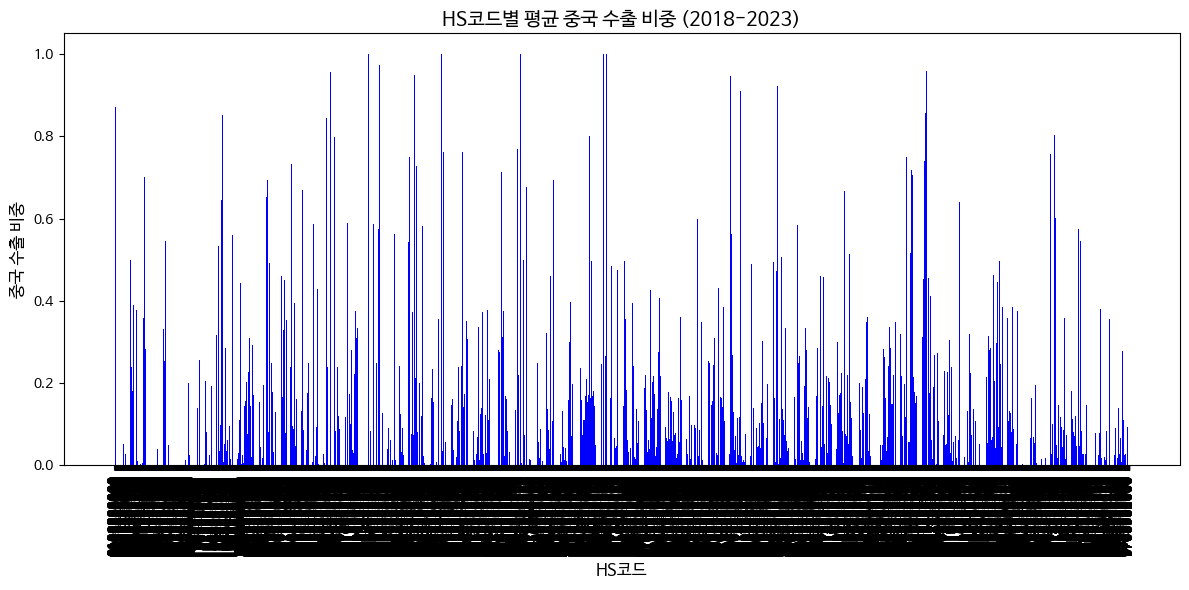

In [12]:
import matplotlib.pyplot as plt

# 2018~2023년 데이터 필터링
filtered_df = final_df[(final_df['year'] >= 2018) & (final_df['year'] <= 2023)]

# HS코드별 중국 수출 비중 계산
hs_code_ratio = (
    filtered_df.groupby('HS코드', as_index=False)
    .agg({'china_ratio': 'mean'})  # 각 HS코드에 대해 중국 수출 비중 평균 계산
)

# NaN 값을 제거
hs_code_ratio = hs_code_ratio.dropna(subset=['china_ratio'])

# 시각화: 중국 수출 비중을 HS코드별로 막대그래프
plt.figure(figsize=(12, 6))
plt.bar(hs_code_ratio['HS코드'].astype(str), hs_code_ratio['china_ratio'], color='blue')

# 그래프 꾸미기
plt.title('HS코드별 평균 중국 수출 비중 (2018-2023)', fontsize=14)
plt.xlabel('HS코드', fontsize=12)
plt.ylabel('중국 수출 비중', fontsize=12)
plt.xticks(rotation=90)  # X축 레이블 회전
plt.tight_layout()

# 그래프 출력
plt.show()


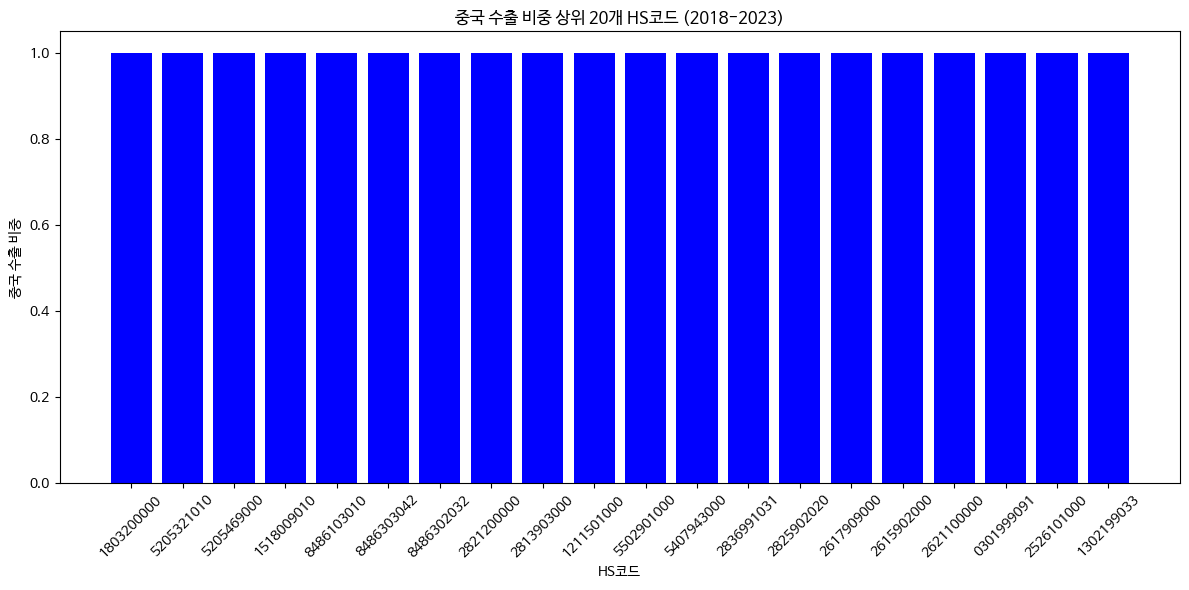

In [13]:
# 비중 높은 상위 20개 HS코드만 추출
top_hs = hs_code_ratio.sort_values(by='china_ratio', ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_hs['HS코드'].astype(str), top_hs['china_ratio'], color='blue')
plt.title('중국 수출 비중 상위 20개 HS코드 (2018-2023)')
plt.xlabel('HS코드')
plt.ylabel('중국 수출 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


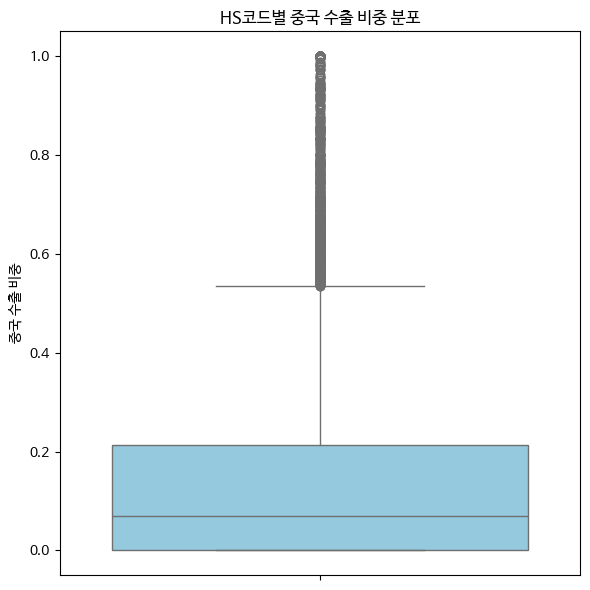

In [15]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=hs_code_ratio, y='china_ratio', color='skyblue')
plt.title('HS코드별 중국 수출 비중 분포')
plt.ylabel('중국 수출 비중')
plt.tight_layout()
plt.show()

# 그림을 보면 대부분의 HS코드는 중국 수출 비중이 낮고
# 중앙값이 약 0.07로 절반 이상이 중국 비중 10% 미만
# 허나 일부 품목은 중국 의존도가 매우 높다 -> 수출비중 0.5~1 사이에 있는 이상치 점들이 고의존 품목군에 해당할 듯?
# 정책적으로 중국 리스크에 매우 민감한 군으로 분류 가능
# -> 분포의 비대칭성이 매우 크다
# 왼쪽에 치우침, 오른쪽 꼬리 김 -> 소수 품목이 중국에 매우 집중

# 이상치를 중국비중이 0.5 이상인 품목군으로 나눠서 고의존 고위험군 후보로
# 중앙선 이하는 일반 또는 저의존군 나눔
# 0.5 이상 / 0.2~0.5 / 0.2 이

In [22]:
# 필요한 통계값 계산
q1 = hs_code_ratio['china_ratio'].quantile(0.25)
q3 = hs_code_ratio['china_ratio'].quantile(0.75)
median = hs_code_ratio['china_ratio'].median()
iqr = q3 - q1
mean_value = hs_code_ratio['china_ratio'].mean()
median_value = hs_code_ratio['china_ratio'].median()

# 이상치 기준점 (상한선)
upper_bound = q3 + 1.5 * iqr

# 출력
print(f"1사분위수 (Q1): {q1:.4f}")
print(f"중앙값 (Median): {median:.4f}")
print(f"3사분위수 (Q3): {q3:.4f}")
print(f"IQR (Q3 - Q1): {iqr:.4f}")
print(f"이상치 기준 상한선 (Q3 + 1.5*IQR): {upper_bound:.4f}")
print("HS코드별 중국 수출 비중 중앙값:", round(median_value, 4))
print("HS코드별 중국 수출 비중 평균값:", round(mean_value, 4))

1사분위수 (Q1): 0.0004
중앙값 (Median): 0.0690
3사분위수 (Q3): 0.2142
IQR (Q3 - Q1): 0.2138
이상치 기준 상한선 (Q3 + 1.5*IQR): 0.5349
HS코드별 중국 수출 비중 중앙값: 0.069
HS코드별 중국 수출 비중 평균값: 0.1507


In [23]:
# Q1, Q3, IQR 계산
q1 = hs_code_ratio['china_ratio'].quantile(0.25)
q3 = hs_code_ratio['china_ratio'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['china_ratio'] > upper_bound]

# 이상치 개수 출력
print("이상치로 판단되는 HS코드 수:", len(outliers))


이상치로 판단되는 HS코드 수: 814


In [25]:
print("전체 대비 이상치 비율:", round(len(outliers) / len(hs_code_ratio) * 100, 2), "%")

전체 대비 이상치 비율: 6.66 %


In [29]:
# 이상치 정의: 중국 수출 비중이 0.5349 이상인 HS코드
outliers = hs_code_ratio[hs_code_ratio['china_ratio'] >= upper_bound ]

# 결과 미리보기
outliers.sort_values(by='china_ratio', ascending=False).head(10)  # 상위 10개

# 저장 (필요 시)
# outliers.to_csv('중국고의존_HS코드_리스트.csv', index=False, encoding='utf-8-sig')

,HS코드,china_ratio
439,0306149010,1.0
5564,4206000000,1.0
5654,4403252000,1.0
5576,4302192000,1.0
5581,4302198000,1.0
5650,4403232000,1.0
775,0602901040,1.0
5687,4403991040,1.0
781,0602902021,1.0
795,0602909020,1.0


In [28]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("월별 HS코드별 중국 수출 비중.csv", encoding='utf-8')

# 2018~2023년 평균값 계산 (HS코드별로)
hs_code_ratio = (
    df[(df['year'] >= 2018) & (df['year'] <= 2023)]
    .groupby('HS코드', as_index=False)
    .agg({'china_ratio': 'mean'})
)

# 사분위수 및 이상치 기준 계산
q1 = hs_code_ratio['china_ratio'].quantile(0.25)
q3 = hs_code_ratio['china_ratio'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

print(f"Q1 (25%): {q1:.4f}")
print(f"Q3 (75%): {q3:.4f}")
print(f"IQR: {iqr:.4f}")
print(f"이상치 기준 (Q3 + 1.5*IQR): {upper_bound:.4f}")

# 이상치 필터링
outliers = hs_code_ratio[hs_code_ratio['china_ratio'] > upper_bound]

# 이상치 개수 및 비율
num_outliers = len(outliers)
total = len(hs_code_ratio)
ratio_outliers = round(num_outliers / total * 100, 2)

print(f"\n이상치로 분류된 HS코드 수: {num_outliers}개")
print(f"전체 HS코드 중 이상치 비율: {ratio_outliers}%")

# 이상치 리스트 저장 (선택)
outliers.to_csv("중국수출비중_이상치_HS코드리스트.csv", index=False, encoding='utf-8-sig')


Q1 (25%): 0.0004
Q3 (75%): 0.2142
IQR: 0.2138
이상치 기준 (Q3 + 1.5*IQR): 0.5349

이상치로 분류된 HS코드 수: 814개
전체 HS코드 중 이상치 비율: 6.12%


In [27]:
# # 매핑 파일 불러오기
# df_map = pd.read_excel('/content/관세청조회코드_v1.1.xlsx')

# # HS코드 앞 4자리 추출
# df_map['HS코드앞4자리'] = df_map['HS코드'].astype(str).str[:4]
# hs_code_ratio['HS코드앞4자리'] = hs_code_ratio['HS코드'].astype(str).str[:4]

# # 병합
# merged = pd.merge(hs_code_ratio, df_map[['HS코드앞4자리', '업종명']], on='HS코드앞4자리', how='left')


In [ ]:
자 그럼 이제 해야할 게

음

대중 수출 비중을 구했지. 그리고 대중 수출 비중이 높은 품목(hscode)이 뭔지도 알 수 있어.
박스플랏을 봤을 때, 대부분의 품목은 중국 수출 의존도가 높지 않지만,
이상치가 6.12%로로 존재해.

이 hs코드는 품목 기준표니까 일단 산업으로 묶어야할 것 같고
산업으로 묶는 거에서 끝나면 안 되고

무역보험 청구 파일이 업종별(ksic)로 되어있으니까

이 무보 파일의 업종과 중국 수출 의존도의 산업을 1대1 매칭을 시켜야하지

그치

음

아씨머리아프네 인터넷에 매칭 기준이 있긴 있던데 중요한건
1대1 매칭이 아름답게 이뤄지지 않는다느거지

합리적인 기준을 세워서 일단 여차저차 매칭하고

해야할거는

중국 수출의존도가 높은 산업과 무역보험 청구율 간의 상관관계를 파악해야하지.

근데 이제

미중 무역 갈등의 변동성이 심할수록 이라는 시계열 데이터가 들어가지

이것도 18-24 산업별 월별 관세율 데이터가 있으면 너무나도 좋겠네

산업별을 구할 수 없으면 고냥 저번에 찾았던 월별 관세율 데이터 써야겠구망

아.......

현주야 머리좀 굴려봐 제발

관세 데이터 / 보험 데이터 / 대중 수출 비율 데이터

전처리된 것들이 이렇게 있다고 하고

산업별, 연도 기준으로 합치고

다중회귀분석 돌리고 가설 검정하고 p-vaule 등등
